## Data Visualization

In [ ]:
# pip install -U leafmap lonboard 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import leafmap
sns.set_theme(style="dark")

In [ ]:
lewo = pd.read_csv('D:/OneDrive/Documents/ArcGIS/Projects/LEWO/LEWO.csv')

In [ ]:
lewo.head()

In [ ]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewo, s=5, color=".15")
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewo, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewo, levels=5, color="w", linewidths=1)

In [ ]:
# Load a GeoDataFrame with the United States outline
us = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter out non-continental states
us = us[(us['name'] != 'Alaska') & (us['name'] != 'Hawaii') & (us['name'] != 'Puerto Rico')]

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))

# Plot the United States outline
us.boundary.plot(ax=ax, color='gray')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewo, s=5, color=".15")

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewo, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewo, levels=5, color="w", linewidths=1)

In [3]:
lewoclip = gpd.read_file('D:/OneDrive/Documents/ArcGIS/Projects/LEWO/lewo_clip.csv')

In [ ]:
# this ran forever the first time and never executed
import geopandas as gpd

# Load a GeoDataFrame with the United States outline
us = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter out non-continental states
us = us[(us['name'] != 'Alaska') & (us['name'] != 'Hawaii') & (us['name'] != 'Puerto Rico')]

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))

# Plot the United States outline
us.boundary.plot(ax=ax, color='gray')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip, s=5, color=".15")

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip, bins=30, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip, levels=5, color="w", linewidths=1)

# Set x and y limits to the range of your data
ax.set_xlim([lewoclip['LONGITUDE'].min(), lewoclip['LONGITUDE'].max()])
ax.set_ylim([lewoclip['LATITUDE'].min(), lewoclip['LATITUDE'].max()])

<Axes: >

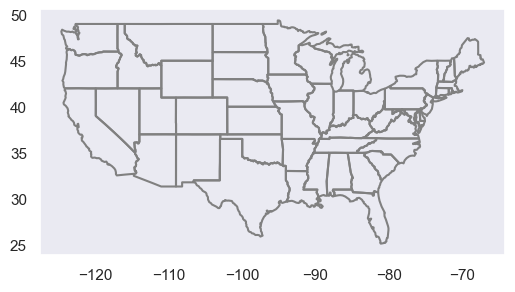

In [2]:
# Load a GeoDataFrame with the United States outline
us = gpd.read_file(
    'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Filter out non-continental states
us = us[(us['name'] != 'Alaska') & (us['name'] != 'Hawaii')
        & (us['name'] != 'Puerto Rico')]

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))

# Plot the United States outline
us.boundary.plot(ax=ax, color='gray')

In [4]:
# Downsample the data
lewoclip_sample = lewoclip.sample(n=10000)

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

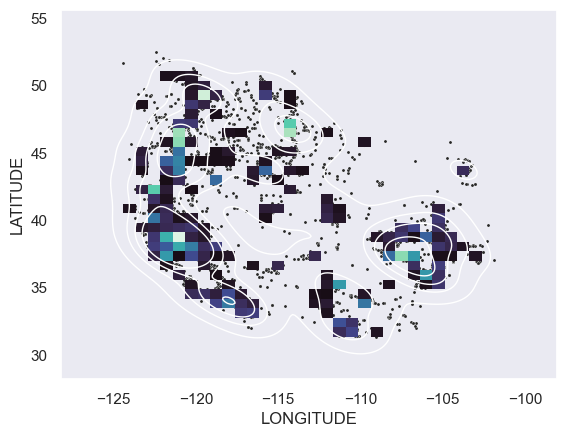

In [6]:
# Convert the 'LATITUDE' and 'LONGITUDE' columns to a numeric type
lewoclip_sample['LATITUDE'] = pd.to_numeric(lewoclip_sample['LATITUDE'], errors='coerce')
lewoclip_sample['LONGITUDE'] = pd.to_numeric(lewoclip_sample['LONGITUDE'], errors='coerce')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, s=5, color=".15")

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, bins=30, pthresh=.1, cmap="mako")
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, levels=5, color="w", linewidths=1)

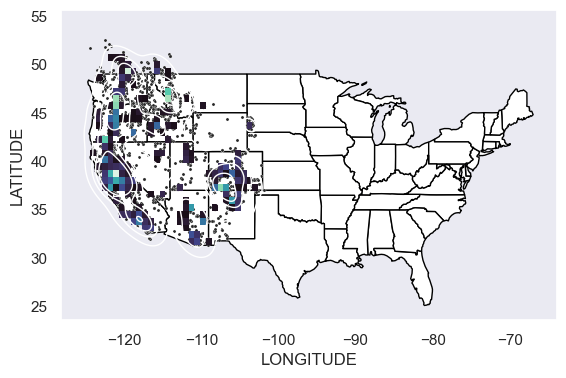

In [7]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the US boundaries
us.plot(ax=ax, color='white', edgecolor='black')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, s=5, color=".15", ax=ax)

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, bins=30, pthresh=.1, cmap="mako", ax=ax)
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, levels=5, color="w", linewidths=1, ax=ax)

plt.show()

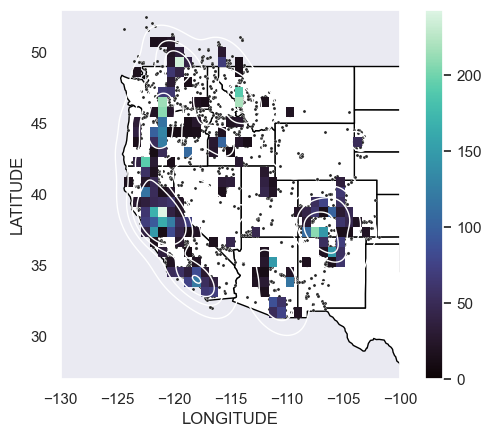

In [18]:
# Clip to western US

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the US boundaries
us.plot(ax=ax, color='white', edgecolor='black')

# Plot the scatterplot
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, s=5, color=".15", ax=ax)

# Plot the histogram and kernel density estimate
sns.histplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, bins=30, pthresh=.1, cmap="mako", cbar=True, ax=ax)
sns.kdeplot(x='LONGITUDE', y='LATITUDE', data=lewoclip_sample, levels=5, color="w", linewidths=1, ax=ax)

# Set the x-limits to only show the western US and clip the y-limits
ax.set_xlim(left=-130, right=-100)
ax.set_ylim(bottom=27, top=53)

plt.show()

In [4]:
lewoclip.to_csv('lewo_clip.csv', index=False)